## Marcov Chains  
represented as a matrix or adirected graph  

# Simulation  
## Rolling our own  


In [1]:
using QuantEcon

In [2]:
psi = [0.1, 0.9]

2-element Array{Float64,1}:
 0.1
 0.9

In [7]:
d = DiscreteRV(psi)

QuantEcon.DiscreteRV{Array{Float64,1},Array{Float64,1}}([0.1,0.9],[0.1,1.0])

In [8]:
draw(d, 5)

5-element Array{Int64,1}:
 2
 1
 2
 2
 2

In [1]:
using QuantEcon

function mc_sample_path(P; init=1, sample_size=1000)
    X = Array(Int64, sample_size) # allocate memory
    X[1] = init
    # === convert each row of P into a distribution === #
    n = size(P)[1]
    P_dist = [DiscreteRV(vec(P[i,:])) for i in 1:n]

    # === generate the sample path === #
    for t in 1:(sample_size - 1)
        X[t+1] = draw(P_dist[X[t]])
    end
    return X
end

mc_sample_path (generic function with 1 method)

defaultをつけないことはできない

In [2]:
P = [0.4 0.6; 0.2 0.8]

2x2 Array{Float64,2}:
 0.4  0.6
 0.2  0.8

In [3]:
X = mc_sample_path(P, sample_size=100000);

In [4]:
println(mean(X .== 1))

0.24529


## Using QuantEcon's Routines

In [10]:
using QuantEcon

In [11]:
P = [0.4 0.6; 0.2 0.8];

In [13]:
mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
2x2 Array{Float64,2}:
 0.4  0.6
 0.2  0.8


In [14]:
X = simulate(mc, 100000)

100000x1 Array{Int64,2}:
 1
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 ⋮
 1
 2
 2
 1
 2
 1
 1
 2
 2
 2
 2
 2

In [15]:
mean(X .== 1)

0.24797

In [16]:
mc = MarkovChain(P, ["employed", "unemployed"])

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
2x2 Array{Float64,2}:
 0.4  0.6
 0.2  0.8


In [17]:
simulate_values(mc, 4)

4x1 Array{ASCIIString,2}:
 "employed"  
 "unemployed"
 "unemployed"
 "unemployed"

# Marginal Distributions  
### Low of total probability  
 given an outcome A, with known conditional probabilities given any of the B_{n} events, each with a known probability itself, what is the total probability that A will happen? The answer to this question is given by Pr(A).  
 [数式](https://wikimedia.org/api/rest_v1/media/math/render/svg/a3fd649bac7848b022c2d1453bcd77070ab9a788)  

# Irreducibility and Aperiodicity  

## Irreducibility  
The stochastic matrix PP is called irreducible if all states communicate; that is, if xx and yy communicate for all (x,y)(x,y) in S×S  

In [5]:
using QuantEcon

In [6]:
P = [0.9 0.1 0.0; 0.4 0.4 0.2; 0.1 0.1 0.8];

In [7]:
mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
3x3 Array{Float64,2}:
 0.9  0.1  0.0
 0.4  0.4  0.2
 0.1  0.1  0.8


In [8]:
is_irreducible(mc)

true

In [9]:
using QuantEcon

P = [1.0 0.0 0.0; 0.1 0.8 0.1; 0.0 0.2 0.8];

mc = MarkovChain(P);

is_irreducible(mc)

false

In [10]:
communication_classes(mc)

2-element Array{Array{Int64,1},1}:
 [1]  
 [2,3]

## Aperiodicity  
the period of a state xx is the greatest common divisor of the set of integers.  
A stochastic matrix is called aperiodic if the period of every state is 1, and periodic otherwise

In [11]:
P = zeros(4, 4);

P[1,2] = 1;

P[2, 1] = P[2, 3] = 0.5;

P[3, 2] = P[3, 4] = 0.5;

P[4, 3] = 1;

mc = MarkovChain(P);

period(mc)

2

In [12]:
is_aperiodic(mc)

false

# Stationary Distribution

In [1]:
P = [.4 .6; .2 .8];

In [4]:
psi = [0.25, 0.75]

2-element Array{Float64,1}:
 0.25
 0.75

In [3]:
psi'

1x2 Array{Float64,2}:
 0.25  0.75

In [15]:
psi'*P

1x2 Array{Float64,2}:
 0.25  0.75

a distribution ψ∗ on S is called stationary for P if ψ∗=ψ∗P  
 If the distribution of X0 is a stationary distribution, then Xt will have this same distribution for all t

### Example  
In a Markov chain, a state i is said to be ergodic if it is aperiodic and positive recurrent (a state is recurrent if there is a nonzero probability of exiting the state and the probability of an eventual return to it is 1; if the former condition is not true the state is "absorbing"). If all states in a Markov chain are ergodic, then the chain is said to be ergodic.

stationary distribution では　p:(1-p) = β:αでバランス  

### Calculating Stationary Distributions  
finding only one stationary distribution

In [5]:
using QuantEcon
P = [.4 .6; .2 .8]
mc = MarkovChain(P)
println(mc_compute_stationary(mc))

[0.25,0.7499999999999999]


# Ergodicity  
the fraction of time the chain spends at state xx converges to ψ∗(x)ψ∗(x) as time goes to infinity  

# Computing Expectations  

 just sum over the distribution of XtXt to get

E[h(Xt)]=∑x∈S(ψPt)(x)h(x)  

## Expectations of Geometric Sums  

?  


# Exercises  

### Exercise 1  

In [1]:
using PyPlot
using QuantEcon

In [6]:
a = b = 0.1
N = 10000
p = b / (a + b)

P = [1-a a; b 1-b]

mc = MarkovChain(P)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
2x2 Array{Float64,2}:
 0.9  0.1
 0.1  0.9


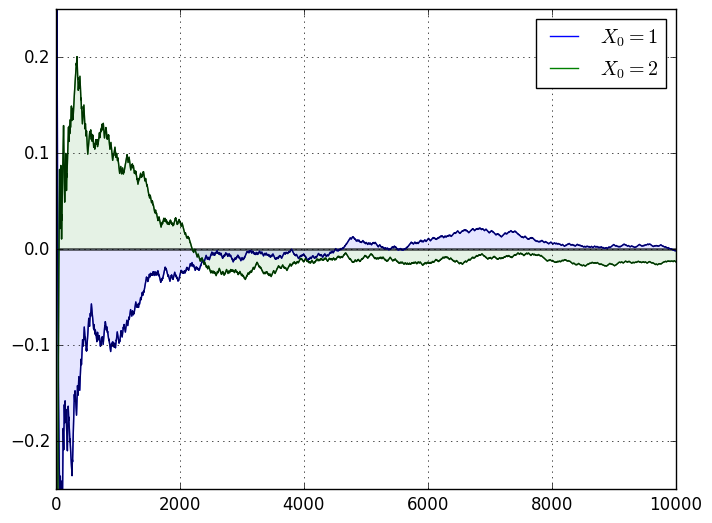

In [7]:
fig, ax = subplots()
ax[:set_ylim](-0.25, 0.25)
ax[:grid]()
ax[:hlines](0, 0, N, lw=2, alpha=0.6)

for (x0, col) in enumerate(["blue", "green"])
    
    X = simulation(mc, N, x0)
    
    X_bar = cumsum(X.==1) ./ (collect(1:N))
    
    ax[:fill_between](1:N, zeros(N), X_bar - p, color=col, alpha=0.1)
    label = LaTeXString("\$X_0 = $x0\$")
    ax[:plot](X_bar - p, color=col, label=label)
    ax[:plot](X_bar - p, "k-", alpha=0.6)
end

ax[:legend](loc="upper right")
fig[:show]()

### Exrecise2

In [8]:
f = open("web_graph_data.txt", "w")
contents = """a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;
"""
write(f, contents)
close(f)

In [12]:
#=
Return list of pages, ordered by rank
=#

infile = "web_graph_data.txt"
alphabet = "abcdefghijklmnopqrstuvwxyz"

n = 14 # Total number of web pages (nodes)

# == Create a matrix Q indicating existence of links == #
#  * Q[i, j] = 1 if there is a link from i to j
#  * Q[i, j] = 0 otherwise
Q = zeros(Int64, n, n)
f = open(infile, "r")
edges = readlines(f)
close(f)
for edge in edges
    from_node, to_node = matchall(r"\w", edge)
    i = searchindex(alphabet, from_node)
    j = searchindex(alphabet, to_node)
    Q[i, j] = 1
end

# == Create the corresponding Markov matrix P == #
P = Array(Float64, n, n)
for i=1:n
    P[i, :] = Q[i, :] / sum(Q[i, :])
end

mc = MarkovChain(P)

# == Compute the stationary distribution r == #
r = mc_compute_stationary(mc)
ranked_pages = [alphabet[i] => r[i] for i=1:n]

# == Print solution, sorted from highest to lowest rank == #
println("Rankings\n ***")
sort_inds = reverse!(sortperm(collect(values(ranked_pages))))
the_keys = collect(keys(ranked_pages))
the_vals = collect(values(ranked_pages))
for i in sort_inds
    @printf("%s: %.4f\n", the_keys[i], the_vals[i])
end

Rankings
 ***
g: 0.1607
j: 0.1594
m: 0.1195
n: 0.1088
k: 0.0911
b: 0.0833
i: 0.0531
e: 0.0531
c: 0.0483
h: 0.0456
l: 0.0320
d: 0.0306
f: 0.0116
a: 0.0029
